In [29]:
%matplotlib inline

import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sys
sys.version

'3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]'

In [10]:
chunksize = 50000

tp = pd.read_csv(
    '..\\pisa2012.csv',
    encoding='latin1',
    index_col=0,
    dtype={15: str, 16: str, 17: str, 21: str, 22: str, 23: str, 24: str, 25: str, 26: str, 37: str,
           45: str, 65: str, 123: str, 156: str, 157: str, 158: str, 159: str, 160: str, 161: str,
           162: str, 163: str, 164: str, 165: str, 166: str, 167: str, 168: str, 169: str, 170: str,
           171: str, 284: str, 285: str, 286: str, 287: str, 288: str, 289: str, 290: str, 291: str,
           292: str, 293: str, 294: str, 295: str, 296: str, 297: str, 298: str, 299: str, 300: str,
           301: str, 302: str, 303: str, 307: str, 308: str, 309: str, 310: str, 311: str, 312: str,
           313: str, 314: str, 315: str, 316: str, 317: str, 318: str, 319: str, 320: str, 321: str,
           322: str, 323: str, 324: str, 325: str, 326: str, 327: str, 328: str, 329: str, 330: str,
           331: str, 332: str, 333: str, 334: str, 335: str, 336: str, 337: str, 338: str, 339: str,
           340: str, 341: str, 342: str, 343: str, 344: str, 345: str, 346: str, 347: str, 348: str,
           349: str, 350: str, 351: str, 352: str, 353: str, 354: str, 355: str, 356: str, 357: str,
           376: str, 377: str, 378: str, 379: str, 380: str, 381: str, 382: str, 383: str, 384: str,
           385: str, 386: str, 387: str, 388: str, 389: str, 390: str, 391: str, 392: str, 393: str,
           394: str, 395: str, 396: str, 397: str, 398: str, 399: str, 400: str, 401: str, 402: str,
           403: str, 475: str, 30: str, 31: str, 36: str, 155: str},
    iterator=True,
    chunksize=chunksize
)

df_list = []

for df in tp:
    df = df.rename(columns={
                'CNT': 'country',
                'STIDSTD': 'studentId',
                'ST01Q01':  'internationalGrade',
                'ST03Q01':  'birthMonth',
                'ST03Q02':  'birthYear',
                'ST04Q01':  'gender',
                'ST08Q01':  'truancyLateForSchool',
                'ST09Q01':  'truancySkipSchoolDay',
                'ST115Q01':  'truancySkipClasses',
                'ST42Q02':  'notGoodMaths',
                'ST46Q06':  'payAttentionInClassesMath',
                'ST49Q01':  'talkAboutMaths',
                'ST49Q02':  'helpFriendsMaths',
                'ST49Q04':  'participateInCompetitions',
                'ST49Q05':  'studyMoreThan2ExtraHoursADay'
              })
    
    df_student_behavior = df[['country', 'studentId', 'internationalGrade', 'birthMonth', 'birthYear',
        'gender','truancyLateForSchool', 'truancySkipSchoolDay', 'truancySkipClasses', 'notGoodMaths',
        'payAttentionInClassesMath', 'talkAboutMaths', 'helpFriendsMaths', 'participateInCompetitions',
        'studyMoreThan2ExtraHoursADay']]
    
    df_list.append(df_student_behavior)
    
df_student_behavior = pd.concat(df_list)

In [52]:
df_student_behavior.info()
df_student_behavior.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 15 columns):
country                         485490 non-null object
studentId                       485490 non-null int64
internationalGrade              485490 non-null int64
birthMonth                      485490 non-null int64
birthYear                       485490 non-null int64
gender                          485490 non-null object
truancyLateForSchool            479143 non-null object
truancySkipSchoolDay            479131 non-null object
truancySkipClasses              479269 non-null float64
notGoodMaths                    313502 non-null object
payAttentionInClassesMath       312900 non-null object
talkAboutMaths                  313495 non-null object
helpFriendsMaths                313025 non-null object
participateInCompetitions       312378 non-null object
studyMoreThan2ExtraHoursADay    312582 non-null object
dtypes: float64(1), int64(4), object(10)
memory usage: 59.3+ MB


,country,studentId,internationalGrade,birthMonth,birthYear,gender,truancyLateForSchool,truancySkipSchoolDay,truancySkipClasses,notGoodMaths,payAttentionInClassesMath,talkAboutMaths,helpFriendsMaths,participateInCompetitions,studyMoreThan2ExtraHoursADay
1,Albania,1,10,2,1996,Female,None,None,1.0,Disagree,Agree,Often,Sometimes,Sometimes,Sometimes
2,Albania,2,10,2,1996,Female,One or two times,None,1.0,NaN,Agree,Sometimes,Often,Sometimes,Always or almost always
3,Albania,3,9,9,1996,Female,None,None,1.0,NaN,Agree,Sometimes,Always or almost always,Never or rarely,Always or almost always


In [207]:
def show_unique_values(df, var_list):
    for var in var_list:
        print(var, ' Unique Values:\n', df[var].unique(), '\n')

show_unique_values(df_student_behavior, df_student_behavior.columns.tolist())

country  Unique Values:
 ['Albania' 'United Arab Emirates' 'Argentina' 'Australia' 'Austria'
 'Belgium' 'Bulgaria' 'Brazil' 'Canada' 'Switzerland' 'Chile' 'Colombia'
 'Costa Rica' 'Czech Republic' 'Germany' 'Denmark' 'Spain' 'Estonia'
 'Finland' 'France' 'United Kingdom' 'Greece' 'Hong Kong-China' 'Croatia'
 'Hungary' 'Indonesia' 'Ireland' 'Iceland' 'Israel' 'Italy' 'Jordan'
 'Japan' 'Kazakhstan' 'Korea' 'Liechtenstein' 'Lithuania' 'Luxembourg'
 'Latvia' 'Macao-China' 'Mexico' 'Montenegro' 'Malaysia' 'Netherlands'
 'Norway' 'New Zealand' 'Peru' 'Poland' 'Portugal' 'Qatar' 'China-Shanghai'
 'Perm(Russian Federation)' 'Florida (USA)' 'Connecticut (USA)'
 'Massachusetts (USA)' 'Romania' 'Russian Federation' 'Singapore' 'Serbia'
 'Slovak Republic' 'Slovenia' 'Sweden' 'Chinese Taipei' 'Thailand'
 'Tunisia' 'Turkey' 'Uruguay' 'United States of America' 'Vietnam'] 

studentId  Unique Values:
 [    1     2     3 ..., 33804 33805 33806] 

internationalGrade  Unique Values:
 [10  9  8 11  7 12 9

In [209]:
def get_variable_frequency(df, var):
    return df.groupby(['country', var]).sum()['internationalGrade'].reset_index()\
                .rename(columns={
                    var: 'frequency',
                    'internationalGrade': var
                })

def get_df_for_variables(df, var_list):
    df_result = pd.concat([get_variable_frequency(df, var) for var in var_list], axis=1)
    return df_result[['country','frequency'] + var_list].T.drop_duplicates().T

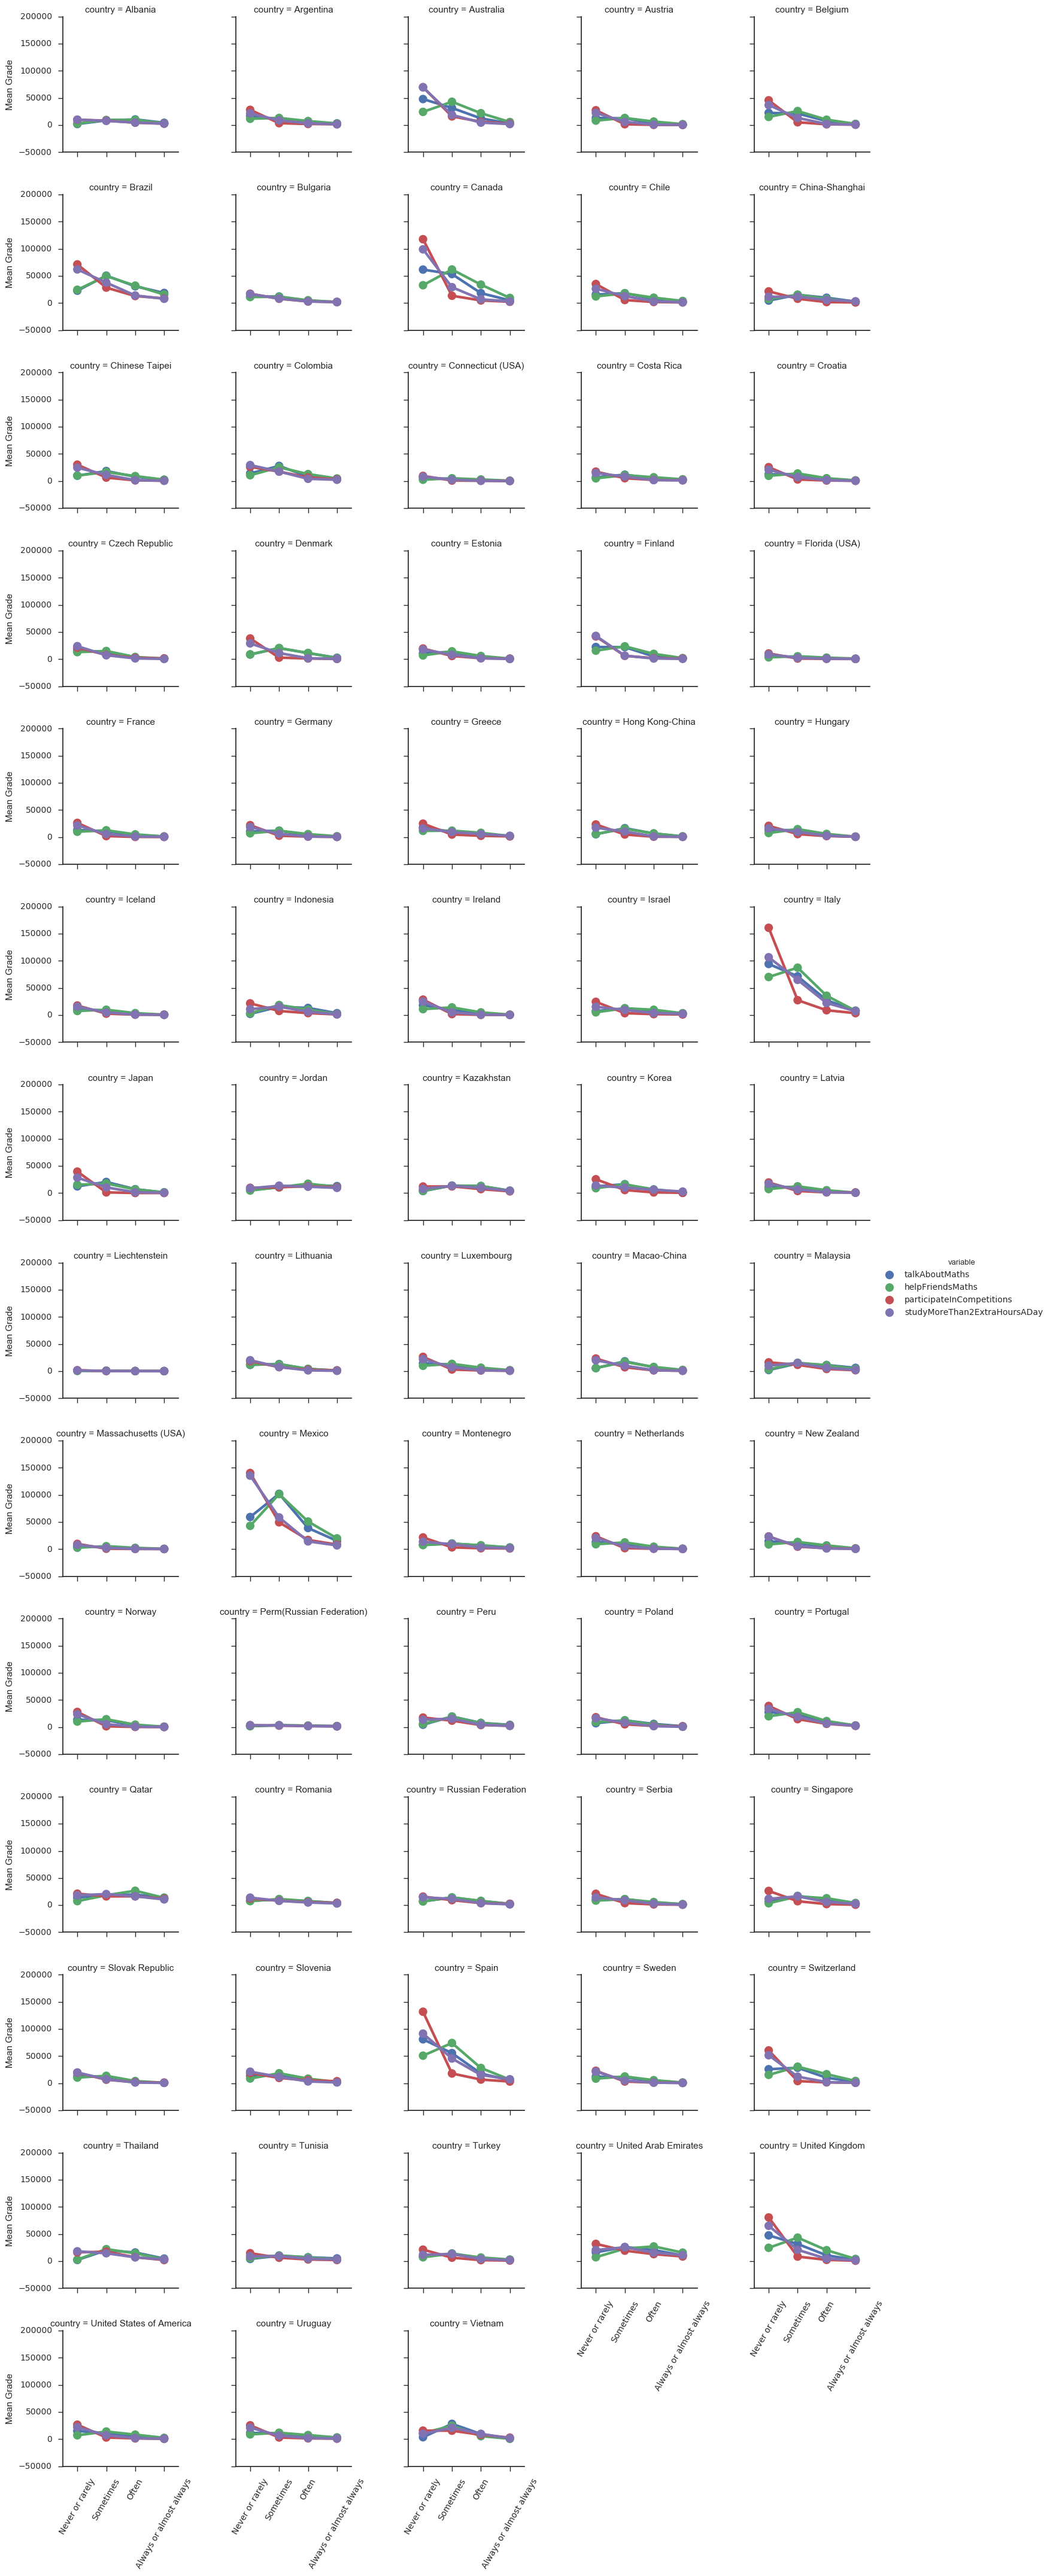

In [210]:
var_list = ['talkAboutMaths','helpFriendsMaths','participateInCompetitions','studyMoreThan2ExtraHoursADay']

df_merge = get_df_for_variables(df_student_behavior, var_list)

df_test = pd.melt(df_merge, id_vars=['country', 'frequency'], value_vars=var_list)
df_test['frequency'] = df_test['frequency'].astype('category')
df_test['frequency'].cat.reorder_categories(['Never or rarely', 'Sometimes', 'Often', 'Always or almost always'],
                                            inplace=True)

g = sns.factorplot(x='frequency', y='value', hue='variable',
                   col='country', data=df_test, col_wrap=5, size=3, aspect=1)
g.set_xticklabels(rotation=60)
g.set_axis_labels('', 'Mean Grade');

count    485490.000000
mean          9.813323
std           3.734726
min           7.000000
25%           9.000000
50%          10.000000
75%          10.000000
max          96.000000
Name: internationalGrade, dtype: float64

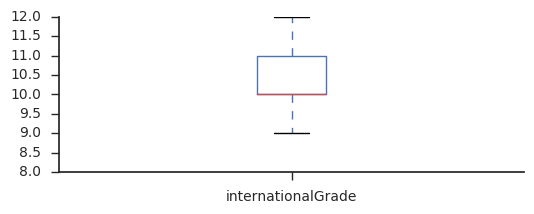

In [208]:
# sns.set_style("ticks")
sns.despine()

display(df_student_behavior['internationalGrade'].describe())

ax=df_student_behavior[df_student_behavior['country'] == 'Brazil']['internationalGrade'].plot(
    kind='box',
    figsize=(6,2)
)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [63]:
df_student_behavior[df_student_behavior['country'] == 'Portugal']['internationalGrade'].quantile(.9)

10.0

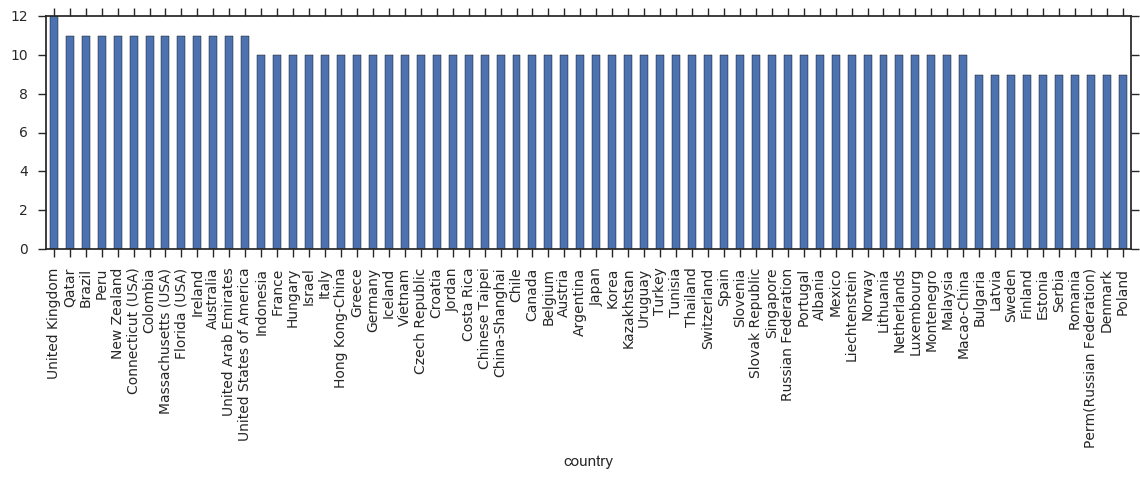

In [65]:
m = df_student_behavior.groupby('country')

errors = m['internationalGrade'].std().sort_values(ascending=False)
m['internationalGrade'].quantile(.9).sort_values(ascending=False).plot(
    kind='bar',
    figsize=(14,3)
)